## Copyright notice

*All material not in the public domain is subject to copyright
(University of Cambridge and/or its licensors) and is licensed for
personal / professional education use only.*


# Pytorch implementation of XOR problem



## Setup

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
## Training data

X = torch.Tensor([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])


T = torch.Tensor([[0],
                  [1],
                  [1],
                  [0]])

## Network architecture

In [3]:
class Network(nn.Module):
    def __init__(self, nhidden=2):
        super(Network, self).__init__()
        self.L1 = nn.Linear(2, nhidden)
        self.L2 = nn.Linear(nhidden, 1)


    def forward(self, x):
        z1 = self.L1(x)
        h  = F.sigmoid(z1)
        z2 = self.L2(h)
        ##return z2  ## can work without second sigmoid.
        return F.sigmoid(z2)



network = Network()

## Optimizer

In [7]:
loss_function = nn.MSELoss()


nepoch = 10000
epsilon = 0.5
optim = torch.optim.SGD(network.parameters(),
                        lr=epsilon)
errors = np.zeros(nepoch)

## Training

Text(0, 0.5, 'error')

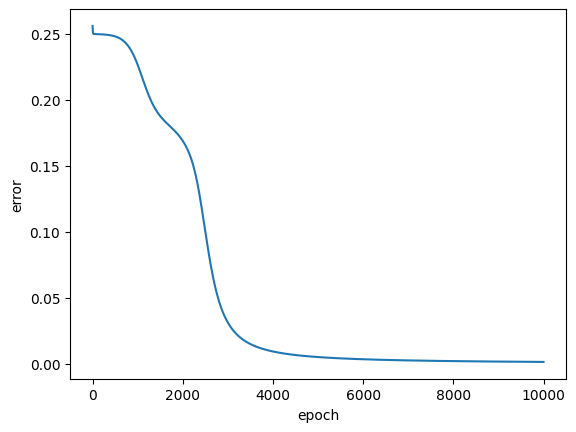

In [8]:
for epoch in range(nepoch):

    Y = network(X)

    loss = loss_function(Y, T)

    ## calculate gradients for all weights in network
    loss.backward()

    optim.step()                # update weights
    optim.zero_grad()           # critical!

    errors[epoch] = loss.detach().numpy()

plt.plot(errors)
plt.xlabel("epoch")
plt.ylabel("error")

## What did it learn?

In [9]:
## examine the weights and biases
list(network.parameters())

[Parameter containing:
 tensor([[ 6.9114,  6.9267],
         [-4.8156, -4.8182]], requires_grad=True),
 Parameter containing:
 tensor([-3.0754,  7.2070], requires_grad=True),
 Parameter containing:
 tensor([[7.6506, 7.8901]], requires_grad=True),
 Parameter containing:
 tensor([-11.4083], requires_grad=True)]

## About this document

Source file: xor_torch.qmd